## Importing libraries

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

## Train image preprocessing

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [10]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [11]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[117.5  115.5  126.5 ]
   [120.25 118.25 129.25]
   [118.25 116.25 127.25]
   ...
   [116.   110.   122.  ]
   [122.75 116.75 128.75]
   [119.75 113.75 125.75]]

  [[120.25 118.25 129.25]
   [121.5  119.5  130.5 ]
   [125.75 123.75 134.75]
   ...
   [119.5  113.5  125.5 ]
   [122.   116.   128.  ]
   [119.75 113.75 125.75]]

  [[120.75 118.75 129.75]
   [124.   122.   133.  ]
   [130.75 128.75 139.75]
   ...
   [125.25 119.25 131.25]
   [123.75 117.75 129.75]
   [125.   119.   131.  ]]

  ...

  [[118.   122.   125.  ]
   [117.75 121.75 124.75]
   [119.75 123.75 126.75]
   ...
   [ 94.25  93.25  98.25]
   [ 99.5   98.5  103.5 ]
   [ 98.75  97.75 102.75]]

  [[115.25 119.25 122.25]
   [117.75 121.75 124.75]
   [117.5  121.5  124.5 ]
   ...
   [ 91.5   90.5   95.5 ]
   [ 96.    95.   100.  ]
   [ 94.5   93.5   98.5 ]]

  [[109.25 113.25 116.25]
   [114.5  118.5  121.5 ]
   [107.   111.   114.  ]
   ...
   [ 91.25  91.25  93.25]
   [ 94.75  94.75  96.75]
   [ 93.    93.    9

## Building Model

In [33]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [34]:
model = Sequential()

In [ ]:
## Bulding convolution layer


In [35]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [36]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [37]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [38]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [39]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [40]:
model.add(Dropout(0.25))

In [41]:
model.add(Flatten())

In [42]:
model.add(Dense(units=1500,activation='relu'))

In [43]:
model.add(Dropout(0.4))

In [44]:
#ouput layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Trainning

In [47]:
training_history= model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2521s 1s/step - accuracy: 0.3977 - loss: 2.1245 - val_accuracy: 0.8488 - val_loss: 0.4914
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2476s 1s/step - accuracy: 0.8370 - loss: 0.5229 - val_accuracy: 0.9150 - val_loss: 0.2858
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2462s 1s/step - accuracy: 0.9034 - loss: 0.2953 - val_accuracy: 0.9291 - val_loss: 0.2216
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2459s 1s/step - accuracy: 0.9372 - loss: 0.1974 - val_accuracy: 0.9504 - val_loss: 0.1571
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2464s 1s/step - accuracy: 0.9527 - loss: 0.1445 - val_accuracy: 0.9549 - val_loss: 0.1389
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2491s 1s/step - accuracy: 0.9624 - loss: 0.1145 - val_accuracy: 0.9521 - val_loss: 0.1513
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2542s 1s/step - accuracy: 0.9712 - loss: 0.0881 - val_accuracy: 0.9619 - val_loss: 0.1277
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2566s 1s/step - accuracy: 0.9744 -

## Model Evaluation

In [48]:
#model evaluation on Training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 617s 281ms/step - accuracy: 0.9882 - loss: 0.0358


In [49]:
print(train_loss,train_acc)

0.032482657581567764 0.989501416683197


In [50]:
#model evaluation on validation set
val_loss,val_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 671s 306ms/step - accuracy: 0.9882 - loss: 0.0358


In [51]:
print(val_loss,val_acc)

0.032482657581567764 0.989501416683197


## Saving Model

In [53]:
model.save("trained_model.keras")

In [54]:
training_history.history

{'accuracy': [0.6003414392471313,
  0.8579273223876953,
  0.9141759872436523,
  0.939910352230072,
  0.9551177024841309,
  0.9648339152336121,
  0.9717049598693848,
  0.975190281867981,
  0.978988528251648,
  0.9819190502166748],
 'loss': [1.3552438020706177,
  0.4491417109966278,
  0.2636682391166687,
  0.18623468279838562,
  0.13812148571014404,
  0.10829496383666992,
  0.08645635098218918,
  0.07537153363227844,
  0.06478532403707504,
  0.05684979632496834],
 'val_accuracy': [0.8487935066223145,
  0.9149783849716187,
  0.92909175157547,
  0.9503756165504456,
  0.954871416091919,
  0.9521397948265076,
  0.9618711471557617,
  0.9620987772941589,
  0.9598793387413025,
  0.9635784029960632],
 'val_loss': [0.49139896035194397,
  0.2857796251773834,
  0.22155173122882843,
  0.15707293152809143,
  0.13887140154838562,
  0.1513398140668869,
  0.12766394019126892,
  0.11503894627094269,
  0.13557688891887665,
  0.13030533492565155]}

In [55]:
#Recording History in json
import json
with open("training_hist.json","w")as f:
    json.dump(training_history.history,f)

In [56]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Accuracy visualization

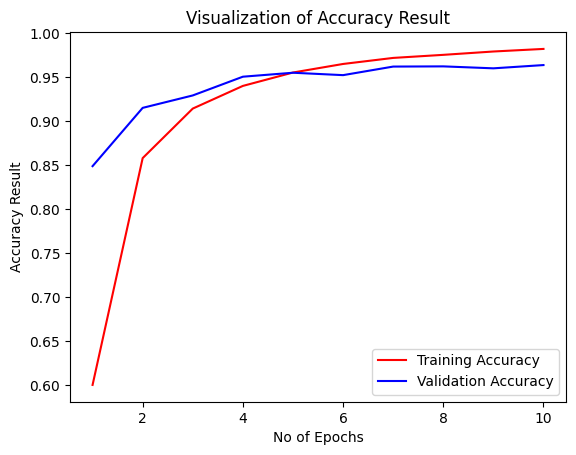

In [59]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Some other matrices for model evaluation

In [60]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [61]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [62]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 129s 234ms/step


(array([[9.9999690e-01, 1.0340401e-06, 4.8690207e-10, ..., 3.9704558e-14,
         1.9817509e-13, 7.2076524e-13],
        [9.9989402e-01, 5.0015537e-06, 1.5459331e-06, ..., 3.7038207e-12,
         3.2613834e-10, 6.3347792e-11],
        [1.0000000e+00, 6.5772270e-12, 1.4116484e-13, ..., 1.5584155e-20,
         7.6199638e-18, 1.2308183e-16],
        ...,
        [2.3146088e-12, 8.9395307e-15, 8.3852558e-10, ..., 2.6558145e-11,
         1.3006487e-11, 9.9999988e-01],
        [6.7479765e-11, 7.2633007e-14, 6.4468697e-10, ..., 2.8904410e-11,
         1.1615878e-11, 9.9999988e-01],
        [6.6975410e-12, 1.0195962e-12, 1.3716020e-10, ..., 7.7129187e-14,
         2.2514511e-11, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [63]:
predicted_catagories = tf.argmax(y_pred,axis=1)
predicted_catagories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [64]:
true_catagories = tf.concat([y for x,y in test_set],axis=0)
true_catagories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [65]:
Y_true = tf.argmax(true_catagories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [68]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_catagories)

In [70]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_catagories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.95      0.95       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.93      0.96       440
                                   Apple___healthy       0.96      0.97      0.97       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.82      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.98      0.

## Confusion Matrices Visualization

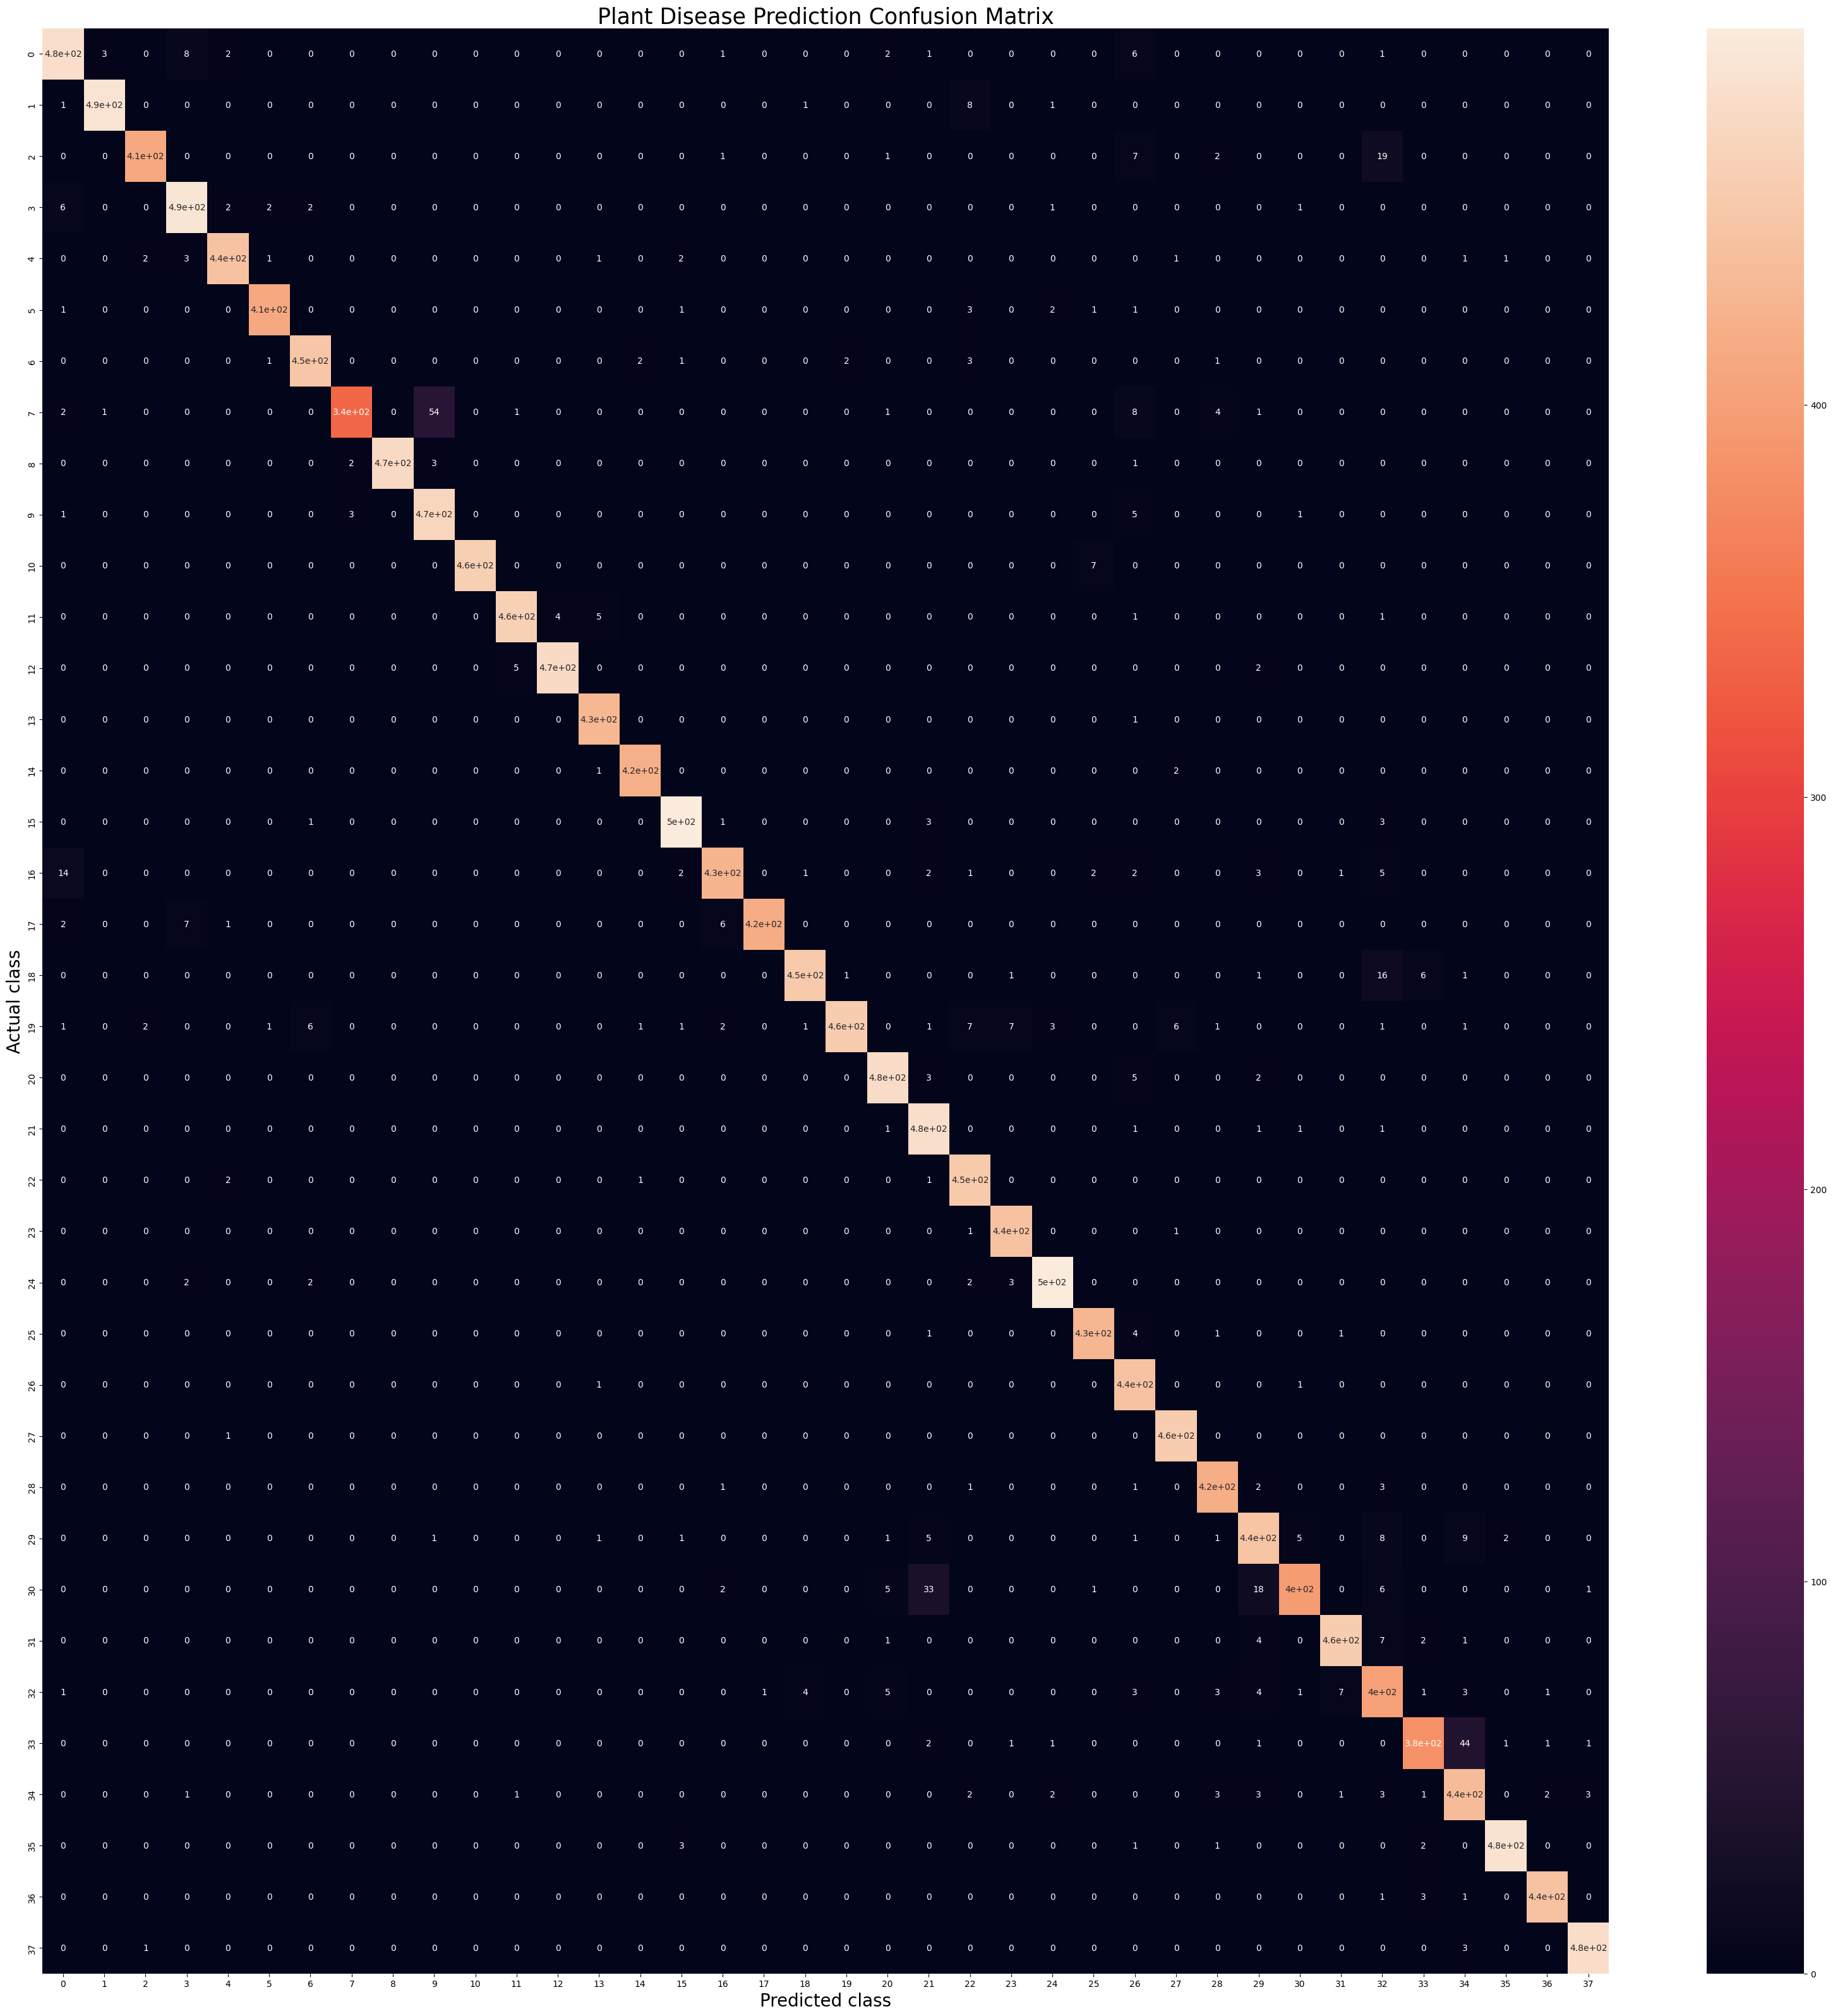

In [78]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()